<a href="https://colab.research.google.com/github/cesaralejon/clusters/blob/main/clusters_Cesar_Olmedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
import numpy as np

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [31]:
filename = ('/content/drive/MyDrive/Coding Dojo/Week 8/cust_seg.csv')
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [32]:
df.shape

(850, 10)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [34]:
df.dropna(inplace=True)

In [35]:
df.drop(columns= "Unnamed: 0", inplace= True)

## Parte 1

In [36]:
scalar = StandardScaler()
scalar_df = scalar.fit_transform(df)

In [42]:
s_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters= 3)
  kmeans.fit(scalar_df)
s_scores.append(silhouette_score(scalar_df, kmeans.labels_))

In [43]:
print(s_scores)

[0.22693002146342872]


In [44]:
kmeans.labels_

array([1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1,
       2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 0,
       1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1,
       1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2,
       0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1,

In [47]:
df['kmeans_clus'] = kmeans.labels_

Text(0, 0.5, 'DebtIncomeRadio')

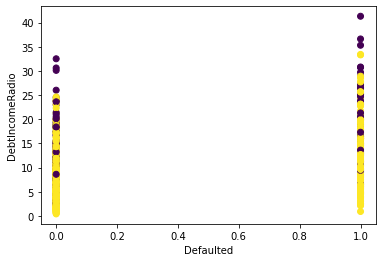

In [48]:
plt.scatter(df['Defaulted'], df['DebtIncomeRatio'], c = df['kmeans_clus'])
plt.xlabel('Defaulted')
plt.ylabel('DebtIncomeRadio')

In [54]:
c1 = df[df['kmeans_clus']==0]
c1.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,kmeans_clus
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0
mean,397.229299,41.878981,1.961783,15.624204,88.866242,3.891573,7.296497,0.292994,14.691720,0.0
std,239.409393,6.852241,1.043204,6.578339,53.240997,3.289986,4.406384,0.456592,7.829652,0.0
min,2.000000,26.000000,1.000000,0.000000,27.000000,0.285000,0.821000,0.000000,2.300000,0.0
25%,201.000000,38.000000,1.000000,11.000000,57.000000,1.751000,4.399000,0.000000,8.500000,0.0
50%,392.000000,41.000000,2.000000,16.000000,74.000000,3.084000,6.240000,0.000000,14.000000,0.0
75%,604.000000,47.000000,3.000000,21.000000,101.000000,4.936000,9.251000,1.000000,18.900000,0.0
max,850.000000,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.000000,41.300000,0.0


In [55]:
c2 = df[df['kmeans_clus']==1]
c2.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,kmeans_clus
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.0
mean,440.069982,32.830571,1.653775,6.296501,33.092081,0.877567,1.832757,0.252302,8.979374,1.0
std,243.817583,7.111450,0.881241,5.016442,15.265026,0.790152,1.281581,0.434734,5.927578,0.0
min,1.000000,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.000000,0.400000,1.0
25%,230.000000,28.000000,1.000000,2.000000,22.000000,0.295500,0.893500,0.000000,4.650000,1.0
50%,446.000000,32.000000,1.000000,5.000000,29.000000,0.594000,1.534000,0.000000,7.600000,1.0
75%,651.500000,38.000000,2.000000,9.000000,40.000000,1.272500,2.504000,1.000000,12.150000,1.0
max,849.000000,55.000000,5.000000,23.000000,105.000000,5.283000,7.217000,1.000000,33.400000,1.0


In [56]:
c3 = df[df['kmeans_clus']==2]
c3.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,kmeans_clus
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
